
### Task: Define Dataset using the descriptive measures of statistics and perform correlation and regression analysis in R.


Dataset Details: The dataset being used in the following notebook is the Heart Failure
Prediction Dataset by Larxel downloaded from Kaggle.
Task 1.1: Understand data attributes and their significance and then import the data in R


In [5]:
data <- read.csv("Life Expectancy Data.csv",header=TRUE)
head(data) 

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [6]:
#Understanding the structure of data
str(data)

'data.frame':	2938 obs. of  22 variables:
 $ Country                        : Factor w/ 193 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 2 2 2 ...
 $ Life.expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult.Mortality                : int  263 271 268 272 275 279 281 287 295 295 ...
 $ infant.deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentage.expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis.B                    : int  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.

##### Here we can see that the data consists of 22 attributes
##### Country,Year,Status,Life expectancy ,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles , BMI ,under-five deaths ,Polio,Total expenditure,Diphtheria , HIV/AIDS,GDP,Population, thinness  1-19 years, thinness 5-9 years,Income composition of resources,Schooling

##### Task 1.2: Subset any 5-10 attributes from the selected dataset and then clean the data for (NA) values.

In [7]:
#Selecting attributes to subset from the dataset
sub_attr <- c("Country","Year","Status","Life.expectancy","Adult.Mortality","infant.deaths","Alcohol","percentage.expenditure","Hepatitis.B","Measles","GDP","BMI")
#Subset from dataset
data_sub <- data[sub_attr]
#Preview of new data
head(data_sub)


Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,GDP,BMI
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,584.25921,19.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,612.69651,18.6
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,631.74498,18.1
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,669.95900,17.6
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,63.53723,17.2
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,553.32894,16.7


In [8]:
#Checking for NA Values
sum(is.na(data_sub))

[1] 1249

### Task 1.3: Define dataset using the descriptive measures like mean, median and standard deviation, etc and discuss their significance.
#### The different descriptive measures being used to describe the dataset are: Min, Max, Range, Mean, Median, Variance, Standard Deviation, Inter-quartile range.
The mean signifies the average of all the values of an attribute.
Median signifies the middle value in the range of values of the attribute.
Range is the difference between the maximum and minimum value of an attribute.
The variance measures the average degree to which each point differs from the mean of all
data points.
Standard deviation is used to tell how measurements for the attribute are spread out from the mean (or expected value).
The summary() function returns a basic summary of dataset's attributes using descriptive measures as shown below

In [9]:
"Life.expectancy"
print(summary(data_sub$Life.expectancy))
paste("Standard Deviation: ",sd(data_sub$Life.expectancy,na.rm = TRUE))
paste("Variance: ",var(data_sub$Life.expectancy,na.rm=TRUE))
paste("Inter-quartile range: ",IQR(data_sub$Life.expectancy,na.rm=TRUE))
paste("Range: ",max(data_sub$Life.expectancy,na.rm=TRUE)-min(data_sub$Life.expectancy,na.rm=TRUE))

[1] "Life.expectancy"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  36.30   63.10   72.10   69.22   75.70   89.00      10 


[1] "Standard Deviation:  9.5238674878243"

[1] "Variance:  90.7040519256368"

[1] "Inter-quartile range:  12.6"

[1] "Range:  52.7"

In [10]:
"BMI"
print(summary(data_sub$BMI))
paste("Standard Deviation: ",sd(data_sub$BMI,na.rm = TRUE))
paste("Variance: ",var(data_sub$BMI,na.rm=TRUE))
paste("Inter-quartile range: ",IQR(data_sub$BMI,na.rm=TRUE))
paste("Range: ",max(data_sub$BMI,na.rm=TRUE)-min(data_sub$BMI,na.rm=TRUE))

[1] "BMI"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   19.30   43.50   38.32   56.20   87.30      34 


[1] "Standard Deviation:  20.0440335025621"

[1] "Variance:  401.763279051831"

[1] "Inter-quartile range:  36.9"

[1] "Range:  86.3"

In [11]:
"GDP"
print(summary(data_sub$GDP))
paste("Standard Deviation: ",sd(data_sub$GDP,na.rm = TRUE))
paste("Variance: ",var(data_sub$GDP,na.rm=TRUE))
paste("Inter-quartile range: ",IQR(data_sub$GDP,na.rm=TRUE))
paste("Range: ",max(data_sub$GDP,na.rm=TRUE)-min(data_sub$GDP,na.rm=TRUE))

[1] "GDP"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     1.68    463.94   1766.95   7483.16   5910.81 119172.74       448 


[1] "Standard Deviation:  14270.169341516"

[1] "Variance:  203637733.035543"

[1] "Inter-quartile range:  5446.870709"

[1] "Range:  119171.06045"

In [12]:
"Adult.Mortality"
print(summary(data_sub$Adult.Mortality))
paste("Standard Deviation: ",sd(data_sub$Adult.Mortality,na.rm = TRUE))
paste("Variance: ",var(data_sub$Adult.Mortality,na.rm=TRUE))
paste("Inter-quartile range: ",IQR(data_sub$Adult.Mortality,na.rm=TRUE))
paste("Range: ",max(data_sub$Adult.Mortality,na.rm=TRUE)-min(data_sub$Adult.Mortality,na.rm=TRUE))

[1] "Adult.Mortality"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    74.0   144.0   164.8   228.0   723.0      10 


[1] "Standard Deviation:  124.292079003422"

[1] "Variance:  15448.5209029929"

[1] "Inter-quartile range:  154"

[1] "Range:  722"

In [13]:
"Measles"
print(summary(data_sub$Measles))
paste("Standard Deviation: ",sd(data_sub$Measles,na.rm = TRUE))
paste("Variance: ",var(data_sub$Measles,na.rm=TRUE))
paste("Inter-quartile range: ",IQR(data_sub$Measles,na.rm=TRUE))
paste("Range: ",max(data_sub$Measles,na.rm=TRUE)-min(data_sub$Measles,na.rm=TRUE))

[1] "Measles"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0     17.0   2419.6    360.2 212183.0 


[1] "Standard Deviation:  11467.2724892346"

[1] "Variance:  131498338.342357"

[1] "Inter-quartile range:  360.25"

[1] "Range:  212183"

#### For more descriptive statistics, we can use stat.desc() from the package {pastecs}

In [14]:
#Install package if not already installed
#install.packages("pastecs")
#Importing pastecs package
library(pastecs)
#Printing the detailed descriptive statistics
stat.desc(data_sub)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,GDP,BMI
nbr.val,NA,2.938000e+03,NA,2.928000e+03,2.928000e+03,2938.000000,2.744000e+03,2.938000e+03,2.385000e+03,2.938000e+03,2.490000e+03,2.904000e+03
nbr.null,NA,0.000000e+00,NA,0.000000e+00,0.000000e+00,848.000000,0.000000e+00,6.110000e+02,0.000000e+00,9.830000e+02,0.000000e+00,0.000000e+00
nbr.na,NA,0.000000e+00,NA,1.000000e+01,1.000000e+01,0.000000,1.940000e+02,0.000000e+00,5.530000e+02,0.000000e+00,4.480000e+02,3.400000e+01
min,NA,2.000000e+03,NA,3.630000e+01,1.000000e+00,0.000000,1.000000e-02,0.000000e+00,1.000000e+00,0.000000e+00,1.681350e+00,1.000000e+00
max,NA,2.015000e+03,NA,8.900000e+01,7.230000e+02,1800.000000,1.787000e+01,1.947991e+04,9.900000e+01,2.121830e+05,1.191727e+05,8.730000e+01
range,NA,1.500000e+01,NA,5.270000e+01,7.220000e+02,1800.000000,1.786000e+01,1.947991e+04,9.800000e+01,2.121830e+05,1.191711e+05,8.630000e+01
sum,NA,5.898090e+06,NA,2.026906e+05,4.825240e+05,89033.000000,1.263025e+04,2.168982e+06,1.930430e+05,7.108762e+06,1.863306e+07,1.112849e+05
median,NA,2.008000e+03,NA,7.210000e+01,1.440000e+02,3.000000,3.755000e+00,6.491291e+01,9.200000e+01,1.700000e+01,1.766948e+03,4.350000e+01
mean,NA,2.007519e+03,NA,6.922493e+01,1.647964e+02,30.303948,4.602861e+00,7.382513e+02,8.094046e+01,2.419592e+03,7.483158e+03,3.832125e+01
SE.mean,NA,8.512100e-02,NA,1.760061e-01,2.296984e+00,2.175632,7.736092e-02,3.667515e+01,5.133463e-01,2.115603e+02,2.859759e+02,3.719519e-01


### Task 1.4: Find outliers in data (if any present)
Boxplots are really useful in descriptive statistics. A boxplot graphically represents the
distribution of a quantitative variable by visually displaying five common location summary
(minimum, median, first/third quartiles and maximum) and any observation that was classified as
a suspected outlier using the interquartile range (IQR) criterion.
The IQR Criterion utilizes the Interquartile range, First Quartile and Third Quartile values to find
out the outliers. All observations 1.5 IQR above Third quartile and 1.5 IQR below First Quartile are
considered outliers.


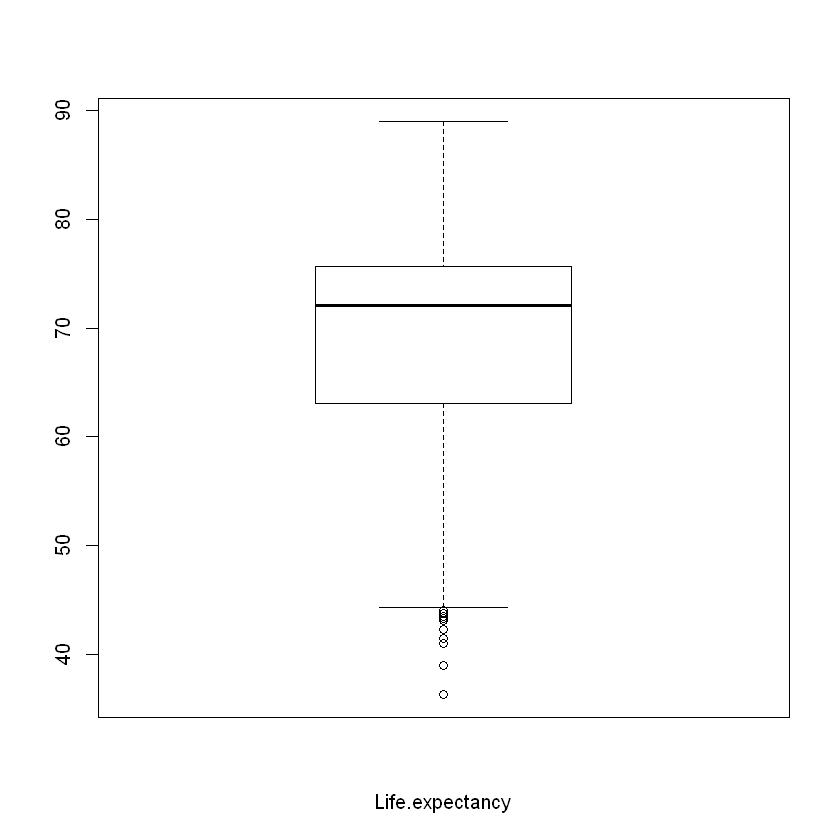

In [15]:
#Generating boxplot for data to find out outliers
boxplot(data_sub$Life.expectancy,xlab = "Life.expectancy")

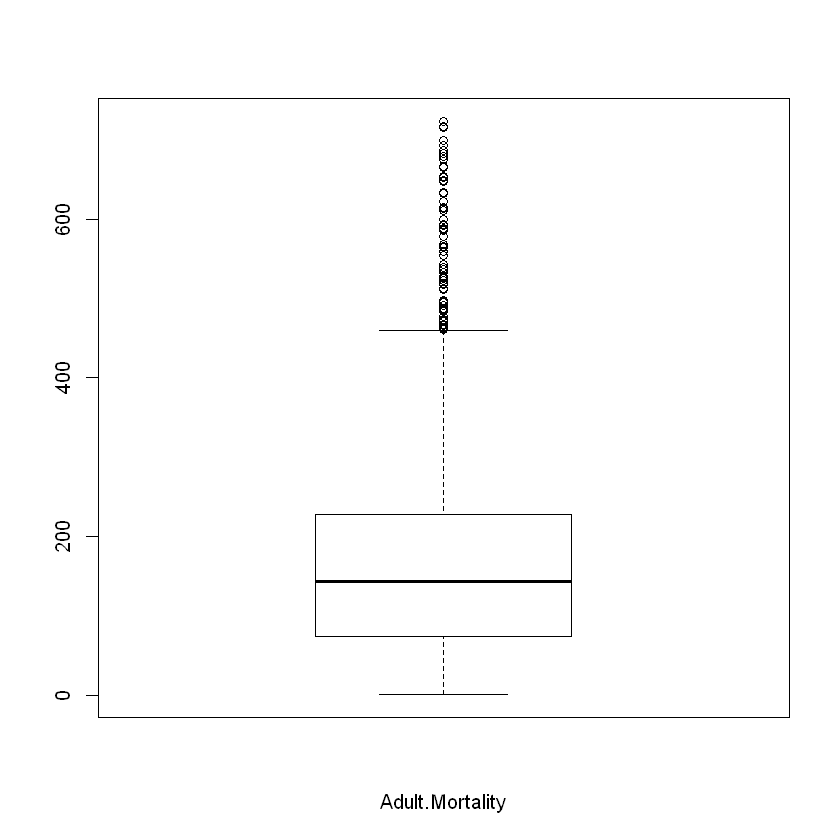

In [16]:
boxplot(data_sub$Adult.Mortality,xlab = "Adult.Mortality")

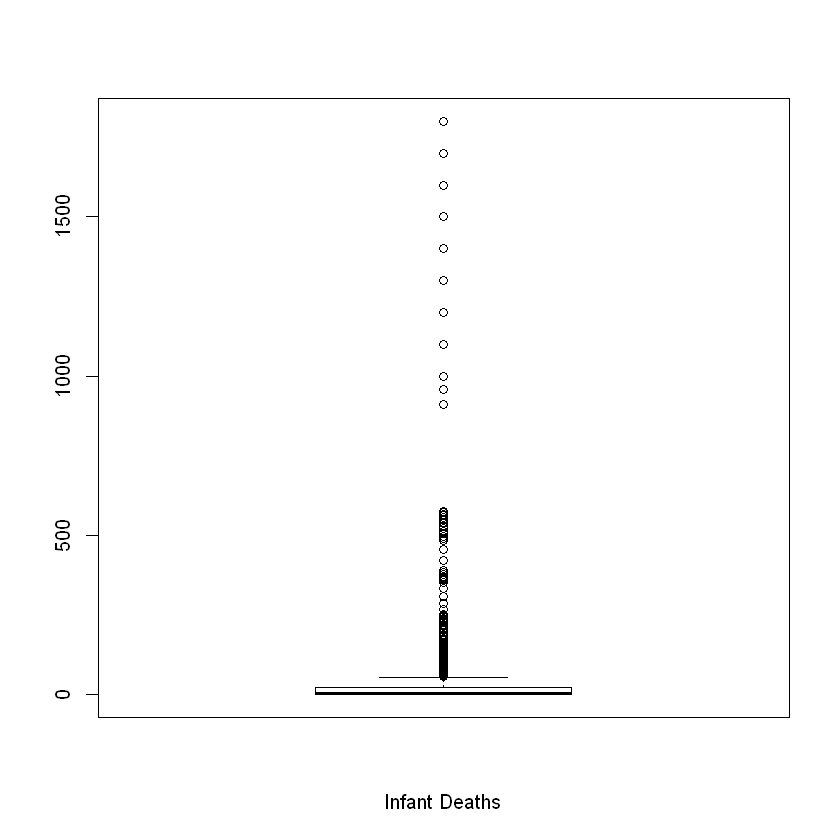

In [17]:
boxplot(data_sub$infant.deaths,xlab = "Infant Deaths")

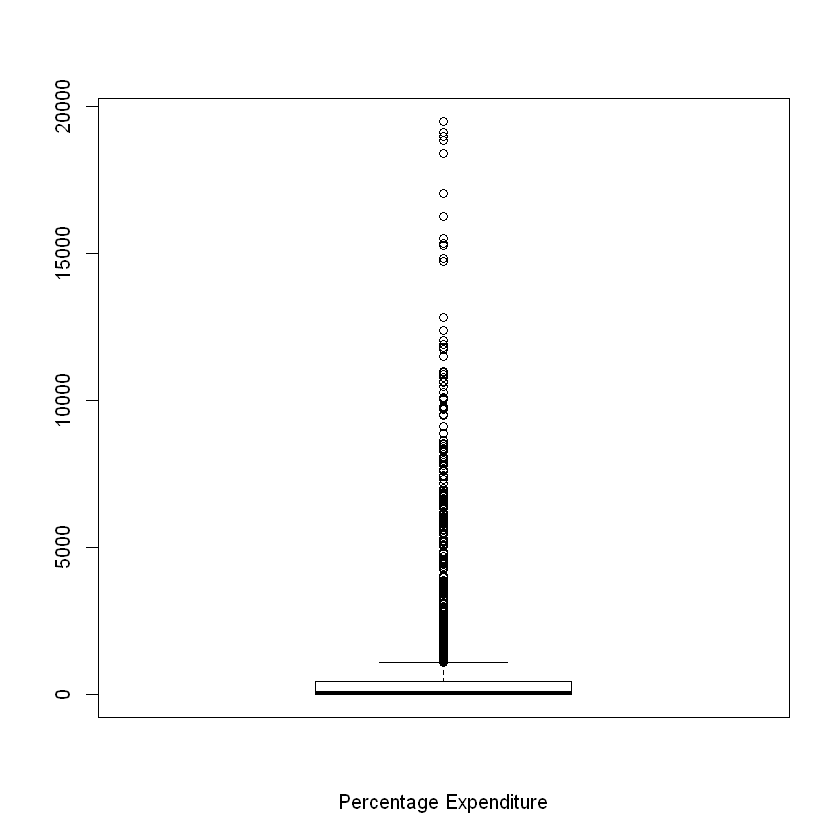

In [18]:
boxplot(data_sub$percentage.expenditure,xlab = "Percentage Expenditure")

From the above boxplots, we can see that the attributes "percentage.expenditure" and "infant.deaths" have some outliers. Since the binary variables have values either 0 or 1, there is no need to detect
outliers in the binary attributes

In [19]:
summary(data_sub$percentage.expenditure)
summary(data_sub$infant.deaths)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000     4.685    64.913   738.251   441.534 19479.912 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     3.0    30.3    22.0  1800.0 

In [20]:
#Removing the outliers from the dataset
IQR_EF = IQR(data_sub$percentage.expenditure)
UL_EF = 441.534 + 1.5*IQR_EF #Upper Limit
LL_EF = 4.685 - 1.5*IQR_EF #Lower Limit
IQR_P = IQR(data_sub$infant.deaths)
UL_P = 22.0  + 1.5*IQR_P #Upper Limit
LL_P = 0.0 - 1.5*IQR_P #Lower Limit

In [21]:
data_clean <- subset(data_sub,((percentage.expenditure > LL_EF) & (percentage.expenditure < UL_EF)& (infant.deaths > LL_P) & (infant.deaths < UL_P) ))

In [22]:
paste("No. of outliers removed = ",nrow(data_sub) - nrow(data_clean))

[1] "No. of outliers removed =  715"

Hence, we removed the 715 outliers from our data.
### Task 1.5: Perform correlation and regression analysis on the data
1.5.1: Draw scatter plots for the dependent variable with respect to all independent
variables.
Here, we are considering the 'Life Expectancy' as the dependent variable and all other attributes as
independent variables.


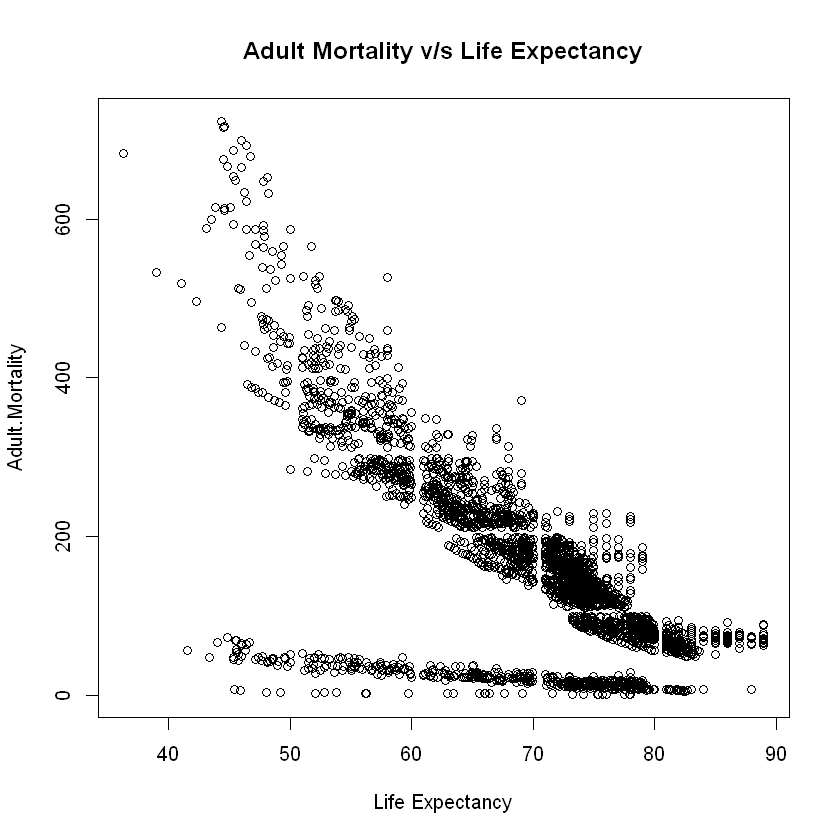

In [20]:
#Adult Mortality v/s Life Expectancy
plot((data_sub$Life.expectancy),(data_sub$Adult.Mortality),xlab="Life Expectancy",ylab="Adult.Mortality",main = "Adult Mortality v/s Life Expectancy")

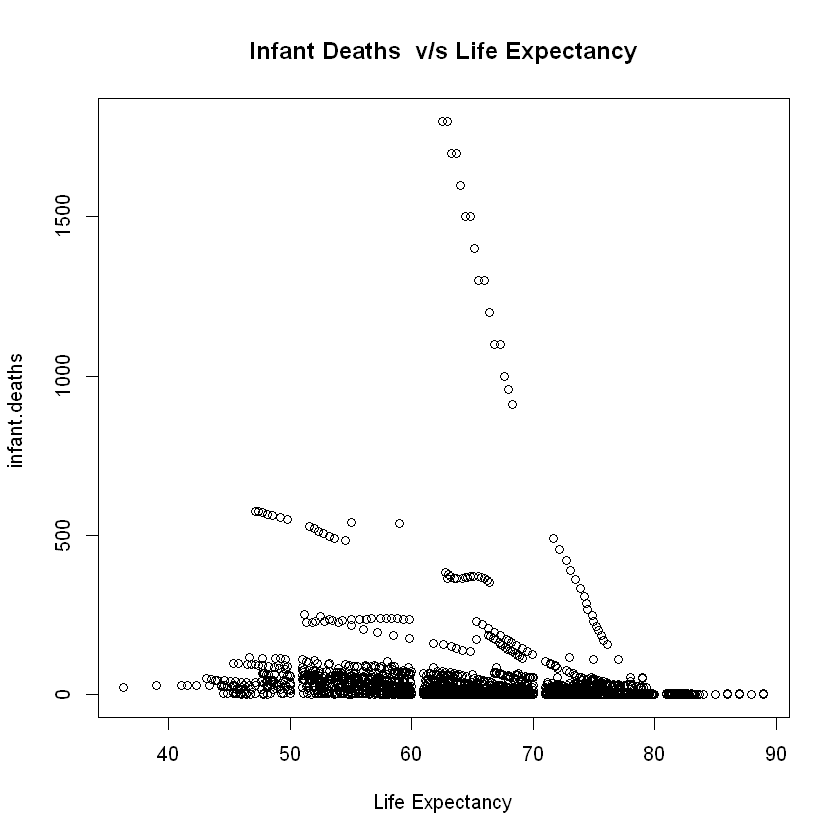

In [21]:
#Infant Deaths v/s Life Expectancy
plot((data_sub$Life.expectancy),(data_sub$infant.deaths),xlab="Life Expectancy",ylab="infant.deaths ",main = "Infant Deaths  v/s Life Expectancy")

### 1.5.2: Calculate the correlation coefficient of each variable with respect to all others, and provide output in a matrix format

Correlation coefficients are used to measure the strength of the relationship between two
variables. Values always range between -1 (strong negative relationship) and +1 (strong positive
relationship). Values at or close to zero imply weak or no linear relationship.
### 1.5.3: Draw Linear Regression Line for combinations of dependent and independent variables

In [22]:
linear_model <- lm(Life.expectancy~Adult.Mortality+infant.deaths+Alcohol, data = data_clean)
print(summary(linear_model))


Call:
lm(formula = Life.expectancy ~ Adult.Mortality + infant.deaths + 
    Alcohol, data = data_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.1867  -2.2028   0.6688   3.4936  18.9382 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     75.179891   0.286739  262.19   <2e-16 ***
Adult.Mortality -0.040359   0.001066  -37.84   <2e-16 ***
infant.deaths   -0.162945   0.010151  -16.05   <2e-16 ***
Alcohol          0.466861   0.035173   13.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.718 on 2030 degrees of freedom
  (189 observations deleted due to missingness)
Multiple R-squared:  0.5805,	Adjusted R-squared:  0.5799 
F-statistic: 936.3 on 3 and 2030 DF,  p-value: < 2.2e-16



Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'na.rm' will be disregarded"

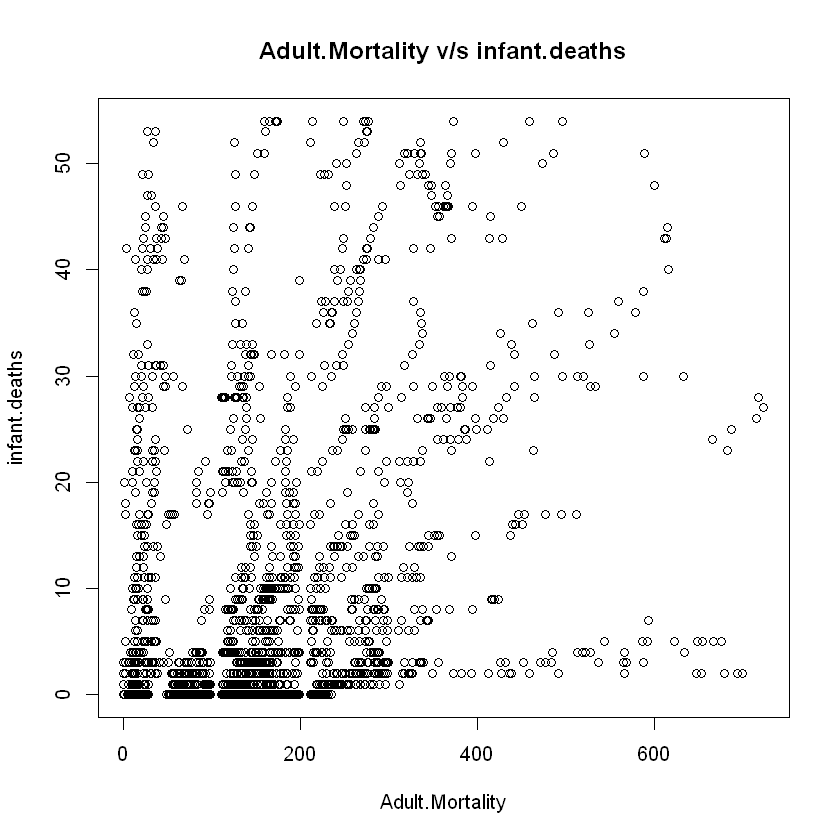

In [32]:
adult_inf = lm(Adult.Mortality~infant.deaths,data=data_clean,na.rm=TRUE)
plot(data_clean$Adult.Mortality,data_clean$infant.deaths,xlab="Adult.Mortality",ylab="infant.deaths",main="Adult.Mortality v/s infant.deaths")


In [36]:
data_clean<-Omit.na(data_clean) 
plot(Adult.Mortality~infant.deaths, data=data_clean)
abline(lm(Adult.Mortality~infant.deaths, data=data_clean))

ERROR: Error in Omit.na(data_clean): could not find function "Omit.na"


In [29]:
summary (adult_inf)


Call:
lm(formula = Adult.Mortality ~ infant.deaths, data = data_clean, 
    na.rm = TRUE)

Residuals:
    Min      1Q  Median      3Q     Max 
-262.76  -76.13   -7.61   57.61  552.26 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   141.1287     3.0689   45.99   <2e-16 ***
infant.deaths   2.8044     0.1825   15.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 117.5 on 2211 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.09651,	Adjusted R-squared:  0.0961 
F-statistic: 236.2 on 1 and 2211 DF,  p-value: < 2.2e-16


#### So For better visualization take another dataset 
#### The dataset being used in the following notebook is the Heart Failure Prediction Dataset by Larxel downloaded from Kaggle.


In [24]:
data <- read.csv("heart_failure_clinical_records_dataset.csv")
head(data)



age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [25]:
sub_attr <- c("age","anaemia","diabetes","ejection_fraction","high_blood_pressure","platelets", "sex", "smoking" ,"time")
#Subset from dataset
data_sub <- data[sub_attr]
#Preview of new data
head(data_sub)

age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,sex,smoking,time
75,0,0,20,1,265000,1,0,4
55,0,0,38,0,263358,1,0,6
65,0,0,20,0,162000,1,1,7
50,1,0,20,0,210000,1,0,7
65,1,1,20,0,327000,0,0,8
90,1,0,40,1,204000,1,1,8


In [26]:
cor(data_sub)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,sex,smoking,time
age,1.00000000,0.08800644,-0.10101239,0.06009836,0.09328868,-0.05235437,0.06542952,0.01866787,-0.22406842
anaemia,0.08800644,1.00000000,-0.01272905,0.03155697,0.03818200,-0.04378555,-0.09476896,-0.10728984,-0.14141398
diabetes,-0.10101239,-0.01272905,1.00000000,-0.00485031,-0.01273238,0.09219283,-0.15772950,-0.14717341,0.03372551
ejection_fraction,0.06009836,0.03155697,-0.00485031,1.00000000,0.02444473,0.07217747,-0.14838597,-0.06731457,0.04172924
high_blood_pressure,0.09328868,0.03818200,-0.01273238,0.02444473,1.00000000,0.04996348,-0.10461463,-0.05571137,-0.19643948
platelets,-0.05235437,-0.04378555,0.09219283,0.07217747,0.04996348,1.00000000,-0.12512048,0.02823445,0.01051391
sex,0.06542952,-0.09476896,-0.15772950,-0.14838597,-0.10461463,-0.12512048,1.00000000,0.44589171,-0.01560822
smoking,0.01866787,-0.10728984,-0.14717341,-0.06731457,-0.05571137,0.02823445,0.44589171,1.00000000,-0.02283894
time,-0.22406842,-0.14141398,0.03372551,0.04172924,-0.19643948,0.01051391,-0.01560822,-0.02283894,1.00000000


In [27]:
linear_model <- lm(time~age+anaemia+diabetes+ejection_fraction+high_blood_pressure + platelets + sex + smoking, data = data_sub)
print(summary(linear_model))


Call:
lm(formula = time ~ age + anaemia + diabetes + ejection_fraction + 
    high_blood_pressure + platelets + sex + smoking, data = data_sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-151.291  -60.228   -9.847   69.276  162.106 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.157e+02  3.026e+01   7.126 8.23e-12 ***
age                 -1.296e+00  3.702e-01  -3.501 0.000537 ***
anaemia             -1.931e+01  8.830e+00  -2.187 0.029519 *  
diabetes             6.086e-01  8.970e+00   0.068 0.945958    
ejection_fraction    3.833e-01  3.711e-01   1.033 0.302595    
high_blood_pressure -2.878e+01  9.152e+00  -3.145 0.001834 ** 
platelets           -8.960e-07  4.511e-05  -0.020 0.984166    
sex                 -1.398e+00  1.043e+01  -0.134 0.893432    
smoking             -5.622e+00  1.045e+01  -0.538 0.590923    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 74.63 on 290 

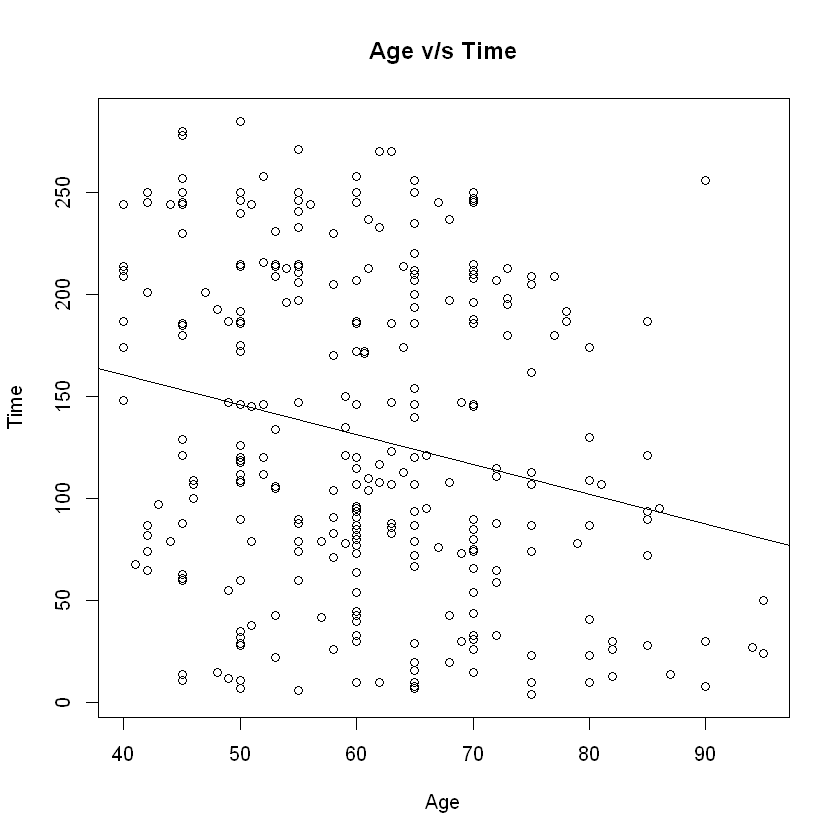

In [28]:
#Plotting the regression line for age v/s time
age_time = lm(time~age,data=data_sub)
plot(data_sub$age,data_sub$time,xlab="Age",ylab="Time",main="Age v/s Time")
abline(age_time)

#### 1.5.4: Draw at least one line by using quadratic and exponential regression equations.

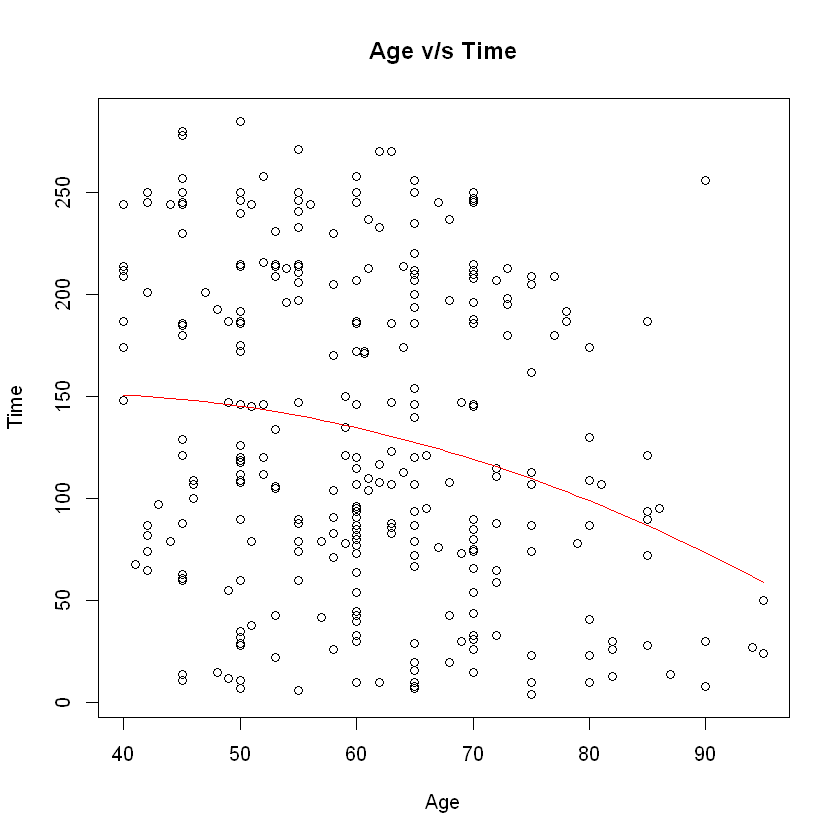

In [29]:
#Plotting quadratic regression equation for time and age
quad_lm <- lm(data_sub$time~data_sub$age+I(data_sub$age^2))
plot(data_sub$age,data_sub$time,xlab="Age",ylab="Time",main="Age v/s Time")
lines(smooth.spline(data_sub$age, predict(quad_lm)),col="red")

In [30]:
summary(quad_lm)



Call:
lm(formula = data_sub$time ~ data_sub$age + I(data_sub$age^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-138.34  -58.53  -14.87   69.97  182.40 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)       123.14750   97.02828   1.269    0.205
data_sub$age        1.68691    3.11316   0.542    0.588
I(data_sub$age^2)  -0.02486    0.02440  -1.019    0.309

Residual standard error: 75.76 on 296 degrees of freedom
Multiple R-squared:  0.05352,	Adjusted R-squared:  0.04713 
F-statistic:  8.37 on 2 and 296 DF,  p-value: 0.0002912


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


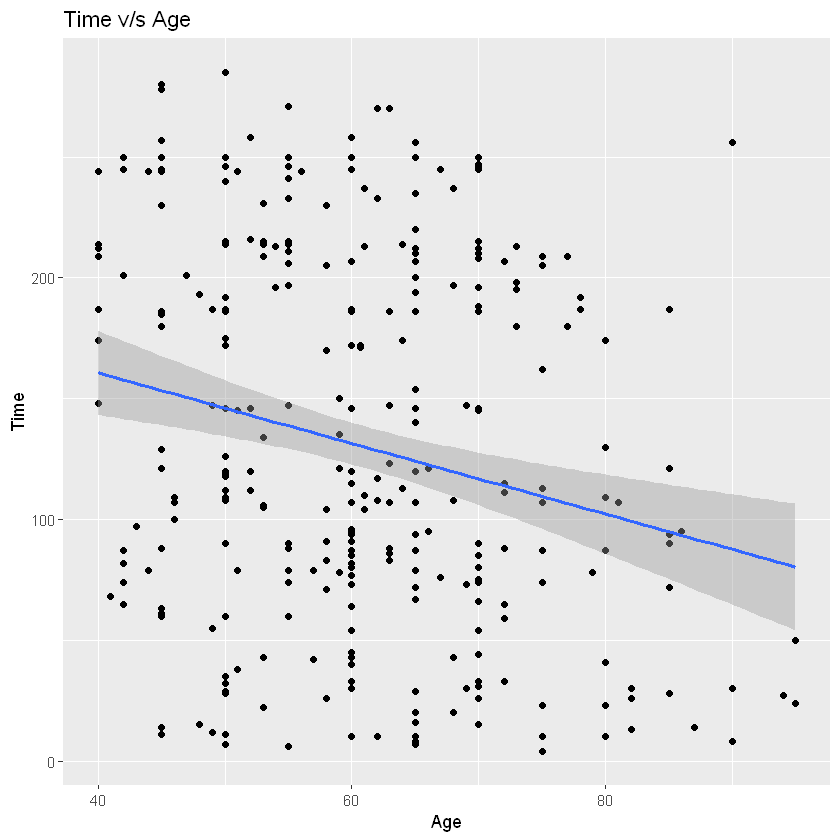

In [31]:
#Plotting exponential regression line for time v/s age
library(ggplot2)
exp_plot <- ggplot(data_sub,aes(x=age,y=time)) + geom_point() + stat_smooth(method="lm",formula = y ~ x,size = 1)
print(exp_plot+labs(y="Time",x="Age") + ggtitle("Time v/s Age"))

## END OF NOTEBOOK